In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
#display(HTML("<style>.jp-RenderedText { font-family: 'Consolas'; }</style>"))
#display(HTML("<style>.jp-RenderedText, .CodeMirror { font-family: 'Consolas'; }</style>"))

C:\Users\tadje\AppData\Local\Temp\ipykernel_7480\1953496844.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [ ]:
import pandas as pd
import re
city_list = pd.read_csv('../oecd_city.csv').iloc[1:,0:1]
city_list = city_list.rename(columns = {'#NAME?' : 'name'})
city_list.loc[:,'name'] = city_list['name'].apply( lambda x : x.replace(' ', ''))
city_list['name'] = city_list['name'].str.lower()
country_cities = {}
current_country = None

for ind, row in city_list.iterrows():

    if not re.search(r'\d', row['name']):
        current_country = row['name'].split(':')[1]
        country_cities[current_country] = []

    else:
        if current_country:
            city_name = row['name'].split(':')[1]
            city_name_cleaned = re.sub(r'\s*\([^)]*\)', '', city_name).strip()
            country_cities[current_country].append(city_name_cleaned)

countries = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia",
    "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin",
    "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cambodia", "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia",
    "Comoros", "Congo", "Costa Rica", "Cote d'Ivoire", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt",
    "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France",
    "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau",
    "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel",
    "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kiribati", "southkorea", "Kosovo",
    "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", "Lithuania",
    "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Marshall Islands", "Mauritania",
    "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique",
    "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia",
    "Norway", "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines",
    "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
    "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone",
    "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka",
    "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", "Thailand", "Timor-Leste",
    "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine",
    "u.a.e", "United Kingdom", "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City",
    "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe",\
    'us', 'puertorico', 'türkiye', 'usa',\
    'hongkong'
]


countries = list(map(lambda x : x.replace(' ', ''), countries))
countries = [country.lower() for country in countries]

pattern_updated = '|'.join([f'\\b{country}\\b|{country}$' for country in countries])
pattern2 = r'[A-Za-z]{2}\d{5}$'
pattern3 = r'salem|ny|nevada|ohio|kansascity|chulavista|wichita|oh44483|keshena|andersenafb|goleta|cincinnati'
pattern4 = r'madurai|mumbai|ludhiana|bangalore'
pattern5 = r'medellin'
pattern6 = r'macedonia'
pattern7 = r'charlestown'
pattern8 = r'上海'

def classify_country(x):
    if re.search(pattern3, x, re.IGNORECASE):
        return 'unitedstates'
    elif re.search(pattern4, x, re.IGNORECASE):
        return 'india'
    elif re.search(pattern5, x, re.IGNORECASE):
        return 'colombia'
    elif re.search(pattern6, x, re.IGNORECASE):
        return 'northmacedonia'
    elif re.search(pattern7, x, re.IGNORECASE):
        return 'saintkittsandnevis'
    elif re.search(pattern8, x, re.IGNORECASE):
        return 'china'
    else:
        return x


country_patterns = {country: '|'.join(map(re.escape, cities)) for country, cities in country_cities.items()}

def classify_country2(sentence):
    for country, pattern in country_patterns.items():
        if re.search(pattern, sentence, re.IGNORECASE):
            return country
    return sentence

final_map = {'us' : 'unitedstates', 'usa' : 'unitedstates', 'korea' : 'southkorea', 'tã¼rkiye': 'turkey', 'czechia' : 'czechrepublic',
            'slovakia' :'slovakrepublic', 'türkiye' :'turkey'}

In [ ]:
import pandas as pd
import re
#import preprocess2
from sklearn.base import BaseEstimator, TransformerMixin

class MyTrnasformer(BaseEstimator, TransformerMixin):
    def __init__(self, pattern_updated, pattern2, classify_country, classify_country2, final_map, countires):
        self.pattern_updated = pattern_updated
        self.pattern2 = pattern2
        self.classify_country = classify_country
        self.classify_country2 = classify_country2
        self.final_map = final_map
        self.countries = countries

        self.bins = [0, 0.1, 0.15, 0.25, 0.35, 0.49, 1.0]
        self.labels = [1, 2, 3, 4, 5, 6]
        self.customer_country_category = None

        self.similar_categories_mapping = {
                'quotation_or_purchase_consultation': 'quotation or purchase consultation',
                'technical consultation': 'technical support',
                'technical': 'technical support',
                'sales': 'sales inquiry'
            }

        self.position_mapping = {
                'ceo/founder': 'CEO/Founder', 'founder': 'CEO/Founder', 'chief executive officer': 'CEO/Founder',
                'ceo/fundador': 'CEO/Founder', 'the big boss': 'CEO/Founder',
                'vice president': 'Vice President', 'vicepresident': 'Vice President', 'vp': 'Vice President',
                'c-level executive': 'C-Level Executive', 'c-levelexecutive': 'C-Level Executive',
                'leadership/executive office/owner': 'C-Level Executive',
                'director': 'Director', 'business unit director': 'Director',
                'associate/analyst': 'Associate/Analyst', 'associate professor': 'Associate/Analyst',
                'assistant professor': 'Associate/Analyst', 'asst prof.': 'Associate/Analyst',
                'entry level': 'Entry Level', 'entrylevel': 'Entry Level',
                'manager': 'Manager', 'gerente': 'Manager',
                'consultant': 'Consultant', 'commercial consultant': 'Consultant',
                'architecture/consult': 'Consultant', 'architect/consultant': 'Consultant',

                'teacher': 'Education Professional', 'educator': 'Education Professional',
                'professor': 'Education Professional', 'physics teacher': 'Education Professional',
                'maths lecturer': 'Education Professional', 'quantitative aptitude faculty': 'Education Professional',
                'english trainer for ielts,toefl,pte,gre,sat exams.': 'Education Professional', 'pgt physics': 'Education Professional',
                'chemistry teacher': 'Education Professional', 'math and physics teacher': 'Education Professional',
                'assistant professor of enlish': 'Education Professional', 'professor of mathematics': 'Education Professional',
                'physics and mathematics teacher': 'Education Professional',
                # 기타 분류
                'other': 'Other', 'others': 'Other', 'not applicable': 'Other', 'no influence': 'Other',
                'other - please specify - cedia association': 'Other',
                'this is a consume display requirement for home purpose.': 'Not Specified',
                'bulgaria': 'Not Specified', 'exhibitiontv': 'Not Specified'
            }

        self.timeline_mapping = {
                # 시간 프레임 관련 값
                'less than 3 months': 'less than 3 months',
                '3 months ~ 6 months': '3 to 6 months',
                '6 months ~ 9 months': '6 to 9 months',
                '9 months ~ 1 year': '9 months to 1 year',
                'more than a year': 'more than a year',
                'less than 6 months': 'less than 6 months',
                '3_months_~_6_months': '3 to 6 months',
                'less_than_3_months': 'less than 3 months',
                '6_months_~_9_months': '6 to 9 months',
                '9_months_~_1_year': '9 months to 1 year',
                'more_than_a_year': 'more than a year',

                # 상황 설명 값
                'quote has been sent to customer.': 'quote sent',
                'client not interested in product..': 'client not interested',
                'being followed up': 'being followed up',
                'update- 7th aug--demo given. customer will confirm next week': 'demo given - follow up',
                'details send': 'details sent',
                'requires detail for tender. no purchase requirement right now.': 'details required for tender',
                'the client is not having any requirement hence closig in system.': 'client has no requirement',
                'discussed with client details mailed.': 'details mailed to client',
                'he is looking for video wall & idb for his office.': 'looking for specific products',
                'details shared': 'details shared',
                'demo to be aligned': 'demo to be scheduled',
                'update- 13th spet--follow up to be done on 15th sept': 'follow up scheduled',
                'partner is already in touch with our rd, orno.': 'partner in touch with representative',
                'rnr': 'no response received',
                'scheduling a meeting': 'meeting scheduled',
                'customer want demo of idb.': 'customer wants demo',
                'already shared quotation through si.': 'quotation shared',
                'quotation shared.': 'quotation shared',
                'duplicate lead': 'duplicate lead',
                'invalid lead': 'invalid lead',
                'demo scheduled for first week feb': 'demo scheduled',
                'forwarded to bdo, being followed up': 'being followed up by business development officer',
                'spoke with custome he want 43" tv': 'customer wants specific product',
                'don’t have budget': 'no budget',
                'client shall get back for exploring demo of idb': 'client will get back regarding demo',
                'already in discussion with partner from bangalore': 'in discussion with partner',
                'require demo price send': 'demo and price inquiry',
                'size not available': 'specific size not available',
                'eol model new model quote requirment after 30 days.': 'end of life model, new model required after 30 days',
                'need to discuss with client in next two months.': 'discussion planned with client',
                'spoken to client, he will check if they need demo and confirm': 'client will confirm about demo',
                '29thsep2021:-no such requirement as of now': 'no requirement as of now',
                'purchase planning after 3 months': 'planning to purchase after 3 months',
                '09-02-2022 requested for boq of requirement': 'bill of quantities requested',
                'converted this lead into opportunity.': 'lead converted into opportunity',
                'demo scheduled for 24th oct': 'demo scheduled',
                'discussed with client. we need to align demo.': 'discussion with client about demo',
                'require demo': 'demo required',
                'client is looking for 86" display with vc solution': 'client looking for specific display with solution',
                'quote sent to customer.': 'quote sent to customer',
                'under discussion': 'under discussion',
                'meeting planned for further discussion': 'meeting planned',
                'customer will come for demo in next week': 'customer will come for demo',
                'he want demo next week': 'demo requested next week',
                'call and discused to custome customer wants demo.': 'customer wants demo, discussed over call',
                'demo planned, will update further status once its completed': 'demo planned and update pending',
                'quote sent, the client is required demo in june': 'quote and demo scheduled in june',
                'will come for the demo': 'client will come for demo',
                'customer has not answering call': 'customer not answering'
            }



    def fit(slef, X, y=None):
        return self

    def transform(self, X, y=None):

        X = X.copy()

        #numeric data - XGBoost는 NA처리 안해도 작동
        float_columns = X.select_dtypes(include=['float', 'int'])
        for name in float_columns:
            X[name].fillna(0, inplace=True)

        #train2.select_dtypes(exclude=["object"])

        #customer_country
        X['customer_country'] = X['customer_country'].str.lower().str.replace(' ', '').str.replace('//', '/')
        X['customer_country'] = X['customer_country'].str.replace(r'/$', '', regex=True)
        X['customer_country'] = X['customer_country'].str.replace(r'^/', '', regex=True)
        X['customer_country'] = X['customer_country'].fillna('undefined')
        X['customer_country'] = X['customer_country'].apply(lambda x: re.search(self.pattern_updated, x, re.IGNORECASE).group() if re.search(self.pattern_updated, x, re.IGNORECASE) else x)
        X['customer_country'] = X['customer_country'].apply(lambda x: 'unitedstates' if re.search(self.pattern2, x) else x)
        X['customer_country'] = X['customer_country'].apply(self.classify_country)
        X['customer_country'] = X['customer_country'].apply(self.classify_country2)
        X['customer_country'] = X['customer_country'].apply(lambda x: self.final_map[x] if x in self.final_map.keys() else x)
        X['customer_country'] = X['customer_country'].apply(lambda x: x if x in self.countries else 'undefined')

        #inquiry_type
        X['inquiry_type'] = X['inquiry_type'].str.lower()
        category_counts = X['inquiry_type'].value_counts()
        categories_to_remove = category_counts[category_counts <= 12].index
        X.loc[X['inquiry_type'].isin(categories_to_remove), 'inquiry_type'] = 'other'
        similar_categories = ['others', 'other_', 'etc.']
        X['inquiry_type'].replace(similar_categories, 'other', inplace=True)
        X['inquiry_type'] = X['inquiry_type'].replace(self.similar_categories_mapping)
        X['inquiry_type'].fillna('undefined', inplace=True)

        #customer_position
        X['customer_position'] = X['customer_position'].replace(self.position_mapping)
        X['customer_position'] = X['customer_position'].str.lower()
        category_counts = X['customer_position'].value_counts()
        categories_to_remove = category_counts[category_counts <= 30].index
        X.loc[X['customer_position'].isin(categories_to_remove), 'customer_position'] = 'other'


        #expected_timeline
        X['expected_timeline'] = X['expected_timeline'].replace(self.timeline_mapping)
        X['expected_timeline'].fillna('undefined', inplace=True)
        X['expected_timeline'] = X['expected_timeline'].str.lower().str.replace('_', '')
        X['expected_timeline'] = X['expected_timeline'].str.lower().str.replace('.', '')
        X['expected_timeline'] = X['expected_timeline'].str.lower().str.replace(' ', '')
        category_counts = X['expected_timeline'].value_counts()
        categories_to_remove = category_counts[category_counts <= 22].index
        X.loc[X['expected_timeline'].isin(categories_to_remove), 'expected_timeline'] = 'etc'

        #etc
        X['ver_win_rate_x'].fillna(0, inplace=True)


        #customer_job, business_subarea
        str_cols = ['customer_job', 'business_subarea', 'product_category', 'business_area']
        X[str_cols] = X[str_cols].fillna('undefined')  # null to 'undefined'
        X[str_cols] = X[str_cols].apply(lambda x: x.str.replace(' ', ''))  # remove spaces
        X[str_cols] = X[str_cols].apply(lambda x: x.str.lower())  # lower case

        X[str_cols] = X[str_cols].apply(lambda x: x.str.replace(pat=r'[^a-z0-9]', repl=r'', regex=True))  # remove special characters (case 1. all, including non-eng to eng)
        # X[str_cols] = X[str_cols].apply(lambda x: x.str.replace(pat=r'[^a-z0-9,/]', repl=r'', regex=True))  # remove special characters (case 2. only a few for tokenizing issue)

        X['business_subarea'] = X['business_subarea'].apply(lambda x: 'other' if x in ['others', 'undefined'] else x)

        X['customer_job'] = X['customer_job'].replace(dict.fromkeys(['etc', 'others'], 'other'))


        X['customer_job'] = X['customer_job'].replace('accountexec/manager', 'accountmanagement')
        X['customer_job'] = X['customer_job'].replace('accountspayable', 'accounting')
        specific_values = ['admin', 'administración', 'administration', 'administrative', 'adminisztráció', 'amministrativo',
                           'imagingadministrator', 'itadmin', 'itadministrator', 'networkadministrator', 'pacsadministrator',
                           'platformadministrator', 'systemsadministrator']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'admin' if x in specific_values else x)

        #4.
        X['customer_job'] = X['customer_job'].replace('administrativeassistant', 'adminassistant')

        #5.
        X['customer_job'] = X['customer_job'].replace('advertisingandpromotionsteam', 'advertising')
        X['customer_job'] = X['customer_job'].replace('storepromotions', 'advertising')
        X['customer_job'] = X['customer_job'].replace('tradeshowevent', 'advertising')

        #6.
        specific_values2 = ['architect', 'architect/owner', 'architectassinteriores', 'arquitecto/consultor', 'projectarchitect']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'architect' if x in specific_values2 else x)

        #7.
        specific_values3 = ['artanddesign','arte_e_design', 'arteydiseño','artist,leadonequipmentselection', 'arts_and_design', 'artsanddesign']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'artist' if x in specific_values3 else x)

        #8.
        specific_values4 = ['assistinservingfood', 'serving', 'servingfood', 'servingrobot', 'waiter']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'serving' if x in specific_values4 else x)

        #9.
        specific_values5 = ['a/vprojectmanager', 'avestimator', 'avprojectmanager', 'avtech', 'avtechnician']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'avtechnician' if x in specific_values5 else x)

        #10.
        specific_values6 = ['authorize(youareresponsibleformakingthefinaldecision)', 'purchasingauthority']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'authorizer' if x in specific_values6 else x)

        #11.
        X['customer_job'] = X['customer_job'].replace('publicbidder', 'bidder')

        #12.
        specific_values7 = ['business_development', 'businessdevelopment']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'businessdevelopment' if x in specific_values7 else x)

        #13.
        specific_values8 = ['cctvmonetoring', 'cctvview']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'cctvoperator' if x in specific_values8 else x)

        #14.
        specific_values9 = ['ceo', 'ceo/founder', 'chief', 'clevelexecutive', 'coo', 'decider', 'decisionmaker',
                            'finalapproval', 'head', 'president', 'presidentforsennco', 'thebigboss', 'underboss',
                            'vicepresident', 'vp/gm']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'chief' if x in specific_values9 else x)

        #15.
        specific_values10 = ['chiefeng', 'chiefengineer', 'chiefofengineering']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'chiefengineer' if x in specific_values10 else x)

        #16.
        specific_values11 = ['chirurgien', 'cirugano', 'doctor', 'főorvos',  'profesionaldecirugía', 'surgeryprofessional',
                             'surgeryprofessional\u200b']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'doctor' if x in specific_values11 else x)

        #17.
        specific_values12 = ['contractor', 'cintractor', 'managingcontractor']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'contractor' if x in specific_values12 else x)

        #18.
        specific_values13 = ['consultant', 'consultant,cabinetfabricator', 'consultant/purchaser', 'consultent', 'consulting']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'consultant' if x in specific_values13 else x)

        #19.
        specific_values14 = ['coordinator', 'corporate/office', 'correspondence', 'costaravteam']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'corporate' if x in specific_values14 else x)

        #20.
        specific_values15 = ['contentcreation,eqconsultant', 'creativedirector']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'creator' if x in specific_values15 else x)

        #21.
        specific_values16 = ['design', 'design/build', 'design/purchaser', 'designandprovideequipment', 'designer',
                             'designer,creativetechnologist', 'designer,producer', 'designers', 'designere/budget',
                             'designerpurchaser', 'design/purchaser', 'graphicdesign', 'kreation_und_design',
                             'kreationunddesign', 'művészet_és_design']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'designer' if x in specific_values16 else x)

        #22.
        specific_values17 = ['design/install/training/support', 'designandinstall', 'designandinstallationcompany', 'designer/installer']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'designinstaller' if x in specific_values17 else x)

        #23.
        specific_values18 = ['designengineer', 'designer/engineer']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'designengineer' if x in specific_values18 else x)

        #24.
        specific_values19 = ['desicionmaker', 'design/decisionmaker', 'generalmanager(decisionmaker)', 'technical/decisionmaker']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'decisionmaker' if x in specific_values19 else x)

        #25.
        specific_values20 = ['designer/pm/gc', 'designer/projectmanager']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'desingpm' if x in specific_values20 else x)

        #26.
        specific_values21 = ['developer', 'developer/property', 'softwaredeveloper']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'developer' if x in specific_values21 else x)

        #27.
        specific_values22 = ['digitaldisplayvssignageneed', 'digitalsignage']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'digitalsignage' if x in specific_values22 else x)

        #28.
        specific_values23 = ['directeurtechnique', 'director', 'director,it', 'directorcomercial',
                             'directorit', 'directorofengineering', 'directoroffinance', 'directorofit',
                             'directoroflodging','directorofoperations', 'directorpurchaser', 'engineeringdirector',
                             'f&bdirectorforbicyclecasino', "i'mdirectingit", 'itdairector',  'itdirector',  'managingdirector',
                             'overseer',  'projectdirector', 'purchasingdirector', 'supervisor', 'technicaldirector']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'director' if x in specific_values23 else x)

        #29.
        specific_values24 = ['distribuidor', 'distributor', 'distributorquotation']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'distributor' if x in specific_values24 else x)

        #30.
        specific_values25 = ['education', 'educator', 'highereducation(college&university)', 'institute&academy']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'educator' if x in specific_values25 else x)

        #31.
        specific_values26 = ['engineer', 'engineering', 'engineering&technical', 'engineering,design,andinstall',
                             'hardwaredesignengineer', 'projectengineer', 'principalengineer', 'seniordesignengineer',
                             'systemengineer', 'systemsengineer']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'engineer' if x in specific_values26 else x)

        #32.
        specific_values27 = ['engagementexecutive', 'engineering&technicalexecutive', 'executive', 'execution',
                             'marketingexecutive', 'financeexecutive', 'operationsexecutive', 'principal',  'principalincharge',
                             'salesexecutive']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'executive' if x in specific_values27 else x)

        #33.
        specific_values28 = ['eventmarketing', 'fieldmarketing', 'marketing', 'marketingcoordinator',
                             'marketingoperations', 'productmarketing', 'technicalmarketing']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'marketing' if x in specific_values28 else x)

        #34.
        specific_values29 = ['equipmentandappprovider', 'equipmentcustodian', 'equipmentplanner', 'equipmentselection']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'equipment' if x in specific_values29 else x)

        #35.
        specific_values30 = ['facilitator', 'facilitatorinstallationservices', 'facilities', 'facilitiesandoperations',
                             'facilityadministrator', 'facilitymanager']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'facilitator' if x in specific_values30 else x)

        #36.
        specific_values31 = ['field/outsidesales', 'sale', 'sales', 'salesman', 'salesmanager',
                             'salesoperations', 'technicalsales', 'salesrep', 'salesengineering', 'sellerinstaller',
                             'vendite', 'vertrieb', 'értékesítés']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'sales' if x in specific_values31 else x)

        #37.
        specific_values32 = ['finance', 'finanzas', 'finanzen', 'pénzügy']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'finance' if x in specific_values32 else x)

        #38.
        specific_values33 = ['gc', 'generalcontractor']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'generalcontractor' if x in specific_values33 else x)

        #39.
        specific_values34 = ['genelmüdür', 'generalmanagement', 'generalmanager', 'generalmanagerpurchaser', 'generamanager',
                             'globalleadofproduction','gm', 'gm/partowner']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'generalmanager' if x in specific_values34 else x)

        #40.
        specific_values35 = ['generalmanagerprojectmanager', 'gestión_de_proyectos']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'generalprojectmanager' if x in specific_values35 else x)

        #41.
        specific_values36 = ['hr','human_resources', 'humanresources', 'hrposting']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'humanresource' if x in specific_values36 else x)

        #42.
        specific_values37 = ['healthcare_services', 'healthcareprofessionals', 'healthcareservices', 'mentalhealth']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'healthcare' if x in specific_values37 else x)

        #43.
        specific_values38 = ['helpdesk/desktopservices', 'helpdeskspecialist']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'helpdesk' if x in specific_values38 else x)

        #44.
        specific_values39 = ['implement', 'informatics,touchcapability', 'information_technology', 'informationtechnology',
                             'informationtechnology\u200b', 'it', 'it/software', 'itdepartment', 'ittech', 'itsupport',
                             'itspecialist', 'itintegrator', 'ithardwaretechnician', 'itinformationtechnology', 'officeit']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'it' if x in specific_values39 else x)

        #45.
        specific_values40 = ['installationandpurchaser', 'installer', 'installer/salesrep', 'installer/systemintegrater',
                             'postinstallsupportandservice',  'planningandinstallation', 'systeminstaller']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'install' if x in specific_values40 else x)

        #46.
        specific_values41 = ['integrador', 'integration', 'integrator', 'intergrator', 'si', 'specifier/integrator',
                             'systemdesigner,integrator']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'integrator' if x in specific_values41 else x)

        #47.
        specific_values42 = ['interiordesigner', 'interiorstylist']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'interior' if x in specific_values42 else x)

        #48.
        specific_values43 = ['instructor', 'teacher', 'teaching']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'instructor' if x in specific_values43 else x)

        #49.
        specific_values44 = ['lead', 'leaddesigner', 'leadengineer', 'leader', 'itprojectlead',
                             'projectlead', 'teamlead', 'teamleader']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'leader' if x in specific_values44 else x)

        #50.
        specific_values45 = ['medicalsolutionprovider', 'medicalsolutionprovider\u200b']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'medicalsolutionprovider' if x in specific_values45 else x)

        #51.
        specific_values46 = ['maintenance', 'maintenancesupervisor', 'maintenancetechnician']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'maintenance' if x in specific_values46 else x)

        #52.
        specific_values47 = ['management',  'manager', 'managgere', 'managingemployee', 'managingpartner', 'manger',
                             'officemanager', 'üzemeltetés']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'manager' if x in specific_values47 else x)

        #53.
        specific_values48 = ['manufacturer', 'manufacturingfactory/plant']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'manufacturer' if x in specific_values48 else x)

        #54.
        specific_values49 = ['media_and_communication', 'media_e_comunicazione', 'mediaandcommunication',
                             'mediaandcommunications',  'medios_de_comunicación', 'medien_und_kommunikation',
                             'média_és_kommunikáció']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'mediaandcommunication' if x in specific_values49 else x)

        #55.
        specific_values50 = ['military_and_protective_services', 'militaryandprotectiveservices']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'military' if x in specific_values50 else x)

        #56.
        specific_values51 = ['obtainquotes,processpurchase', 'planner/purchaser', 'purchase', 'purchaseandinstall',
                             'purchasedept', 'purchaser', 'purchaser,itandinstaller', 'purchasers', 'purchasing',
                             'purchasingagent', 'purchasingcoordinator','purchsing']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'purchase' if x in specific_values51 else x)

        #57.
        specific_values52 = ['operaciones', 'operations']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'operation' if x in specific_values52 else x)

        #58.
        specific_values53 = ['operationsmanager', 'opsmgr']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'operationmanager' if x in specific_values53 else x)

        #59.
        specific_values54 = ['product_management', 'productmanagement']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'productmanager' if x in specific_values54 else x)

        #60.
        specific_values55 = ['pm', 'producer/projectmanager', 'program_and_project_management', 'program_and_project_manager',
                             'program_és_projektmenedzsment', 'programandprojectmanagement',  'programm_und_projektmanagement',
                             'programmundprojektmanagement',  'projectcoordinator', 'projectadministrator', 'programdirectors',
                             'projectionmanager', 'projectmanage', 'projectmanager', 'projectmanager/designer',
                             'projectmanager/estimator', 'projectmanager/principal','projectsales/manage',
                             'projektmenedzsment\tprogramandprojectmanagement', 'projectdesigner','projectfacilitator',
                             'projecthead', 'projectrmgmt', 'r&dprojectmanager']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'projectmanager' if x in specific_values55 else x)

        #61.
        specific_values56 =  ['productresearch', 'productresearcher', 'projectresearcher', 'research/install',
                              'researchproductsandprices', 'researchandinstalaltion']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'research' if x in specific_values56 else x)

        #62.
        specific_values57 = ['medicalimagingspecialist', 'profesionalderadiología', 'spécialiste_en_imagerie_médicale']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'medicalimagingspecialist' if x in specific_values57 else x)

        #63.
        specific_values58 = ['proprietário(a)', 'propertyowner', 'ownerrepresentation', 'owningcompany',
                             'ownnermarketingdirector', 'owner/projectmanager', 'businessowner', 'productowner',
                             'buildingowner']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'owner' if x in specific_values58 else x)

        #64.
        specific_values59 = ['partscoordinator', 'buyer,coordinating', 'servicecoordinator']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'coordinator' if x in specific_values59 else x)

        #65.
        specific_values60 = ['procurement', 'procurementspecialist', 'procurment', 'sourcing/procurement']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'procurement' if x in specific_values60 else x)

        #66.
        specific_values61 = ['quality_assurance', 'qualityassurance']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'qualityassurance' if x in specific_values61 else x)

        #67.
        specific_values62 = [ 'quotationcurator',  'quotegathering/proposertoowner', 'quotingproject', 'sourcing',
                             'sourcing&quotingforenduser']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'quotation' if x in specific_values62 else x)

        #68.
        specific_values63 = ['radiology_professional',  'radiologyprofessional']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'radiology' if x in specific_values63 else x)

        #69.
        specific_values64 = ['recommend', 'recommend(yourecommendspecificproductsortechnologiesforthesolution)',
                             'recommendation', 'recommender']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'recommend' if x in specific_values64 else x)

        #70.
        specific_values65 = ['requirementsandbuyer', 'buyer']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'buyer' if x in specific_values65 else x)

        #71.
        specific_values66 = ['research&development', 'researchanddevelopement']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'researchanddevelopment' if x in specific_values66 else x)

        #72.
        specific_values67 = ['reseller', 'reseller/integrator', 'technicaladvisor,reseller', 'vendor/reseller']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'reseller' if x in specific_values67 else x)

        #73.
        specific_values68 = ['retailer/installer', 'revendedor']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'retailer' if x in specific_values68 else x)

        #74.
        specific_values69 = ['display', 'displayourproducts', 'restaurantdisplay', 'usingforwindowdisplay']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'display' if x in specific_values69 else x)

        #75.
        specific_values70 = ['energy', 'renewableenergy']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'energy' if x in specific_values70 else x)

        #76.
        specific_values71 = ['changetv', 'replacementtv', 'replacingtv']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'changetv' if x in specific_values71 else x)

        #77.
        specific_values72 = ['signageforanattraction', 'signagemanager', 'signagesubcontractorp/m', 'signcompany',
                             'slidingpicturesofbeautysalon']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'signage' if x in specific_values72 else x)

        #78.
        specific_values73 = ['solutionadvisor', 'solutionengineer', 'solutionprovider', 'solutionsarchitect',
                             'solutionsproviderandspecifier', 'softwaresolution']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'solution' if x in specific_values73 else x)

        #79.
        specific_values74 = ['systemsdesign', 'systemsdesigner']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'systemdesigner' if x in specific_values74 else x)

        #80.
        specific_values75 = ['strategiccommunications', 'strategy&operationsspecialist']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'strategy' if x in specific_values75 else x)

        #81.
        specific_values76 = ['support', 'support/facilitator,designer']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'support' if x in specific_values76 else x)

        #82.
        specific_values77 = ['supplier', 'supplierandinstallation']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'supplier' if x in specific_values77 else x)

        #83.
        specific_values78 = ['tech', 'technical', 'technologyconsultant', 'technologydesigner', 'techservice',
                             'avtechnician', 'fixingtv', 'emergingtechnology/innovation']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'tech' if x in specific_values78 else x)

        #84.
        X['customer_job'] = X['customer_job'].replace('tierarzt', 'vat')

        #
        specific_valuess = ['altro', 'egyéb', 'otros', 'n/a', 'nothing', 'norespoxseonphonewilltryagain',
                            'na', 'other', 'otro', 'otro', 'others', 'otherstores', 'requirementclose',
                            'var', 'askingforquoteforclient', 'autres', 'conferenceroom', 'conferencetable', 'entrylevel',
                            'enduser', 'forconfrence', 'hometheater', 'hoteltv', 'hardware', 'infrastructure',
                            'inquirytobuy/contactustest', 'mastermind', 'mainenduseroftheproduct', 'menu', 'mindenes',
                            'need1tv55"edgeled4kuhd', 'needonetv', 'norequirment', 'partofvideowall', 'photos',
                            'primary', 'primaryenduser',  'projectteammember', 'sonstiges', 'stakeholder', 'submittingproposal',
                            'test4', 'tester', 'thepersonwiththecreditcard', 'undefined', 'user', 'videowall', 'weareiniceland']
        X['customer_job'] = X['customer_job'].apply(lambda x: 'other' if x in specific_valuess else x)



        #product_category

                # 1.
        specific2_values = ['videowallsignage', 'ledsignage', 'interactivesignage', 'oledsignage', 'standardsignage',
                            'highbrightnesssignage', 'specialsignage', 'ur640s', 'smarttvsignage', 'ur640', 'uhdsignage',
                            'digitalsignage', 'tvsignage', 'monitorsignagecommercialtv']
        X['product_category'] = X['product_category'].apply(lambda x: 'signage' if x in specific2_values else x)

        # 2.
        specific2_values2 = ['hoteltv', 'hospitaltv', 'commercialtv', 'commercialtvtv', 'htv', '43us660h0sdawz']
        X['product_category'] = X['product_category'].apply(lambda x: 'tv' if x in specific2_values2 else x)

        # 3.
        specific2_values3 = ['pc', 'laptop']
        X['product_category'] = X['product_category'].apply(lambda x: 'pclaptop' if x in specific2_values3 else x)

        # 4.
        specific2_values4 = ['solaress', 'solarsystemac']
        X['product_category'] = X['product_category'].apply(lambda x: 'solar' if x in specific2_values4 else x)

        # 5.
        specific2_values5 = ['solarchiller', 'systemacchiller']
        X['product_category'] = X['product_category'].apply(lambda x: 'chiller' if x in specific2_values5 else x)

        # 6.
        specific2_values6 = ['monitorsignagemoniormonitortv', 'monitorpc', 'moniormonitortvtv', 'computermonitors']
        X['product_category'] = X['product_category'].apply(lambda x: 'monitor' if x in specific2_values6 else x)

        # 7.
        specific2_values7 = ['control', 'highbrightness', 'softwaresolution', 'signagecaresolution', 'technicalsupport',
                             'services', 'salesinquiry', 'solaraircare', 'chilleraircare', 'systemacaircare']
        X['product_category'] = X['product_category'].apply(lambda x: 'support' if x in specific2_values7 else x)

        # 8.
        specific2_values8 = ['medicaldisplay', 'commercialdisplay', 'medicaldisplays', 'led', 'ledallinone', 'fhdseries',
                             'oled']
        X['product_category'] = X['product_category'].apply(lambda x: 'display' if x in specific2_values8 else x)

        # 9.
        specific2_values9 = ['multisplit', 'singlesplit', 'multiinverter', 'alllgvrfsystems', 'multiv5air', 'multivwater5',
                             'multiv5vrf', 'vrfmultisplitsinglesplit', 'vrfmultisplitsinglesplitchiller', 'vrfsinglesplit',
                             'vrfmultisplit', 'ogrzewaniepompyciepa']
        X['product_category'] = X['product_category'].apply(lambda x: 'vrf' if x in specific2_values9 else x)

        # 10.
        specific2_values10 = ['videowall', 'videowallrmk', 'projector', 'video']
        X['product_category'] = X['product_category'].apply(lambda x: 'videoprojector' if x in specific2_values10 else x)

        # 11.
        specific2_values11 = ['heating', 'athermodynamicwaterheater']
        X['product_category'] = X['product_category'].apply(lambda x: 'heater' if x in specific2_values11 else x)

        # 12.
        specific2_values12 = ['idb', 'educationcreateboard']
        X['product_category'] = X['product_category'].apply(lambda x: 'interactivedigitalboard' if x in specific2_values12 else x)

        # 13.
        specific2_values13 = ['lgonequickseries', 'onequickseries', 'lgonequick']
        X['product_category'] = X['product_category'].apply(lambda x: 'onequick' if x in specific2_values13 else x)

        # 14.
        specific2_values14 = ['webos', 'procentric', 'clouddevice']
        X['product_category'] = X['product_category'].apply(lambda x: 'oscloud' if x in specific2_values14 else x)

        # 15.
        specific2_values15 = ['rac', 'tetooucasseteinverter', 'arcondicionadoresidencial', 'residentialairconditioner',
                              'aireacondicionadoresidencial']
        X['product_category'] = X['product_category'].apply(lambda x: 'airconditioner' if x in specific2_values15 else x)

        # 16.
        specific2_values16 = ['robots']
        X['product_category'] = X['product_category'].apply(lambda x: 'robot' if x in specific2_values16 else x)

        # 17.
        specific2_values17 = ['outros', 'otros']
        X['product_category'] = X['product_category'].apply(lambda x: 'other' if x in specific2_values17 else x)

        value_counts = X['product_category'].value_counts()

        #X['product_category'] = X['product_category'].apply(lambda x: 'other' if value_counts[x] < 50 or value_counts[x] == 53 else x)
        X['product_category'] = X['product_category'].apply(lambda x: 'other' if pd.isna(x) or value_counts.get(x, 0) < 50 or value_counts.get(x, 0) == 53 else x)
        return X


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}
        self.unknown_label = -9

    def fit(self, X, y=None):
        for column in X.columns:
            if X[column].dtype == 'object':
                unique_values = X[column].unique()
                encoder = {value:index for index, value in enumerate(unique_values)}
                encoder['undefined'] = -9
                self.encoders[column] = encoder

        return self

    def transform(self, X):
        X = X.copy()
        for column, encoder in self.encoders.items():
            X[column] = X[column].map(lambda x : encoder.get(x, self.unknown_label))
        return X


In [ ]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class MixedDataTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, numeric_columns=None, method='yeo-johnson'):
        self.numeric_columns = numeric_columns
        self.power_transformer = PowerTransformer(method=method, standardize=False)
        self.min_values = None
        self.max_values = None

    def fit(self, X, y=None):

        X_numeric = X[self.numeric_columns]
        X_transformed = self.power_transformer.fit_transform(X_numeric)


        self.min_values = np.min(X_transformed, axis=0)
        self.max_values = np.max(X_transformed, axis=0)

        return self

    def transform(self, X):
        # Power Transformation 적용
        X_numeric = X[self.numeric_columns]
        X_transformed = self.power_transformer.transform(X_numeric)

        # 데이터 정규화
        X_normalized = self._normalize_data(X_transformed, self.min_values, self.max_values)

        X_transformed = X.copy()
        X_transformed[self.numeric_columns] = X_normalized

        return X_transformed

    def _normalize_data(self, data, min_data, max_data):

        return -1 + (data - min_data) * 2 / (max_data - min_data)



In [ ]:

df_train = pd.read_csv('../train.csv')
df_test = pd.read_csv('../submission.csv')
transformer = MyTrnasformer(pattern_updated, pattern2, classify_country, classify_country2, final_map, countries)
train_x = transformer.transform(df_train)
test_x = transformer.transform(df_test)


In [ ]:
cat_encoder = CategoricalEncoder()
train_encoded = cat_encoder.fit_transform(train_x)
test_encoded = cat_encoder.transform(test_x)

In [ ]:
numeric_columns1 = \
['com_reg_ver_win_rate', 'historical_existing_cnt', 'lead_desc_length', 'ver_win_rate_x', 'ver_win_ratio_per_bu']  # 변환할 수치형 열 이름

transformer = MixedDataTransformer(numeric_columns=numeric_columns1)
train_6f = transformer.fit_transform(train_encoded)
test_6f = transformer.transform(test_encoded)

In [ ]:
test_6f

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,19844,0.00,5,1,0.878890,47466,6,0,0.999242,0.0,...,5,1,1,0,0.865298,0.928573,8,45,278,0
1,9738,0.25,8,2,-1.000000,5405,6,1,-1.000000,0.0,...,8,1,0,0,-0.942782,-1.000000,11,4,437,1
2,8491,1.00,6,1,-1.000000,13597,1,1,-1.000000,0.0,...,6,0,0,0,-0.743194,0.999569,4,32,874,0
3,19895,0.50,8,1,0.976586,17204,4,0,-1.000000,0.0,...,8,4,0,0,0.865298,0.928573,8,4,194,0
4,10465,1.00,5,1,0.886261,2329,6,0,0.771470,1.0,...,5,0,1,1,1.000000,0.972495,0,0,167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13855,0.50,5,0,-1.000000,40292,4,0,0.982431,0.0,...,5,1,0,0,-1.000000,-1.000000,1,4,97,0
5267,7979,0.25,8,2,-1.000000,47466,4,0,-1.000000,0.0,...,8,1,0,0,-1.000000,-1.000000,1,4,438,1
5268,12887,0.75,5,0,-1.000000,46227,1,0,-1.000000,0.0,...,5,0,0,0,-1.000000,-1.000000,1,4,97,0
5269,17530,0.00,8,2,-1.000000,45667,6,1,-1.000000,0.0,...,24,1,0,0,-1.000000,-1.000000,1,4,429,0


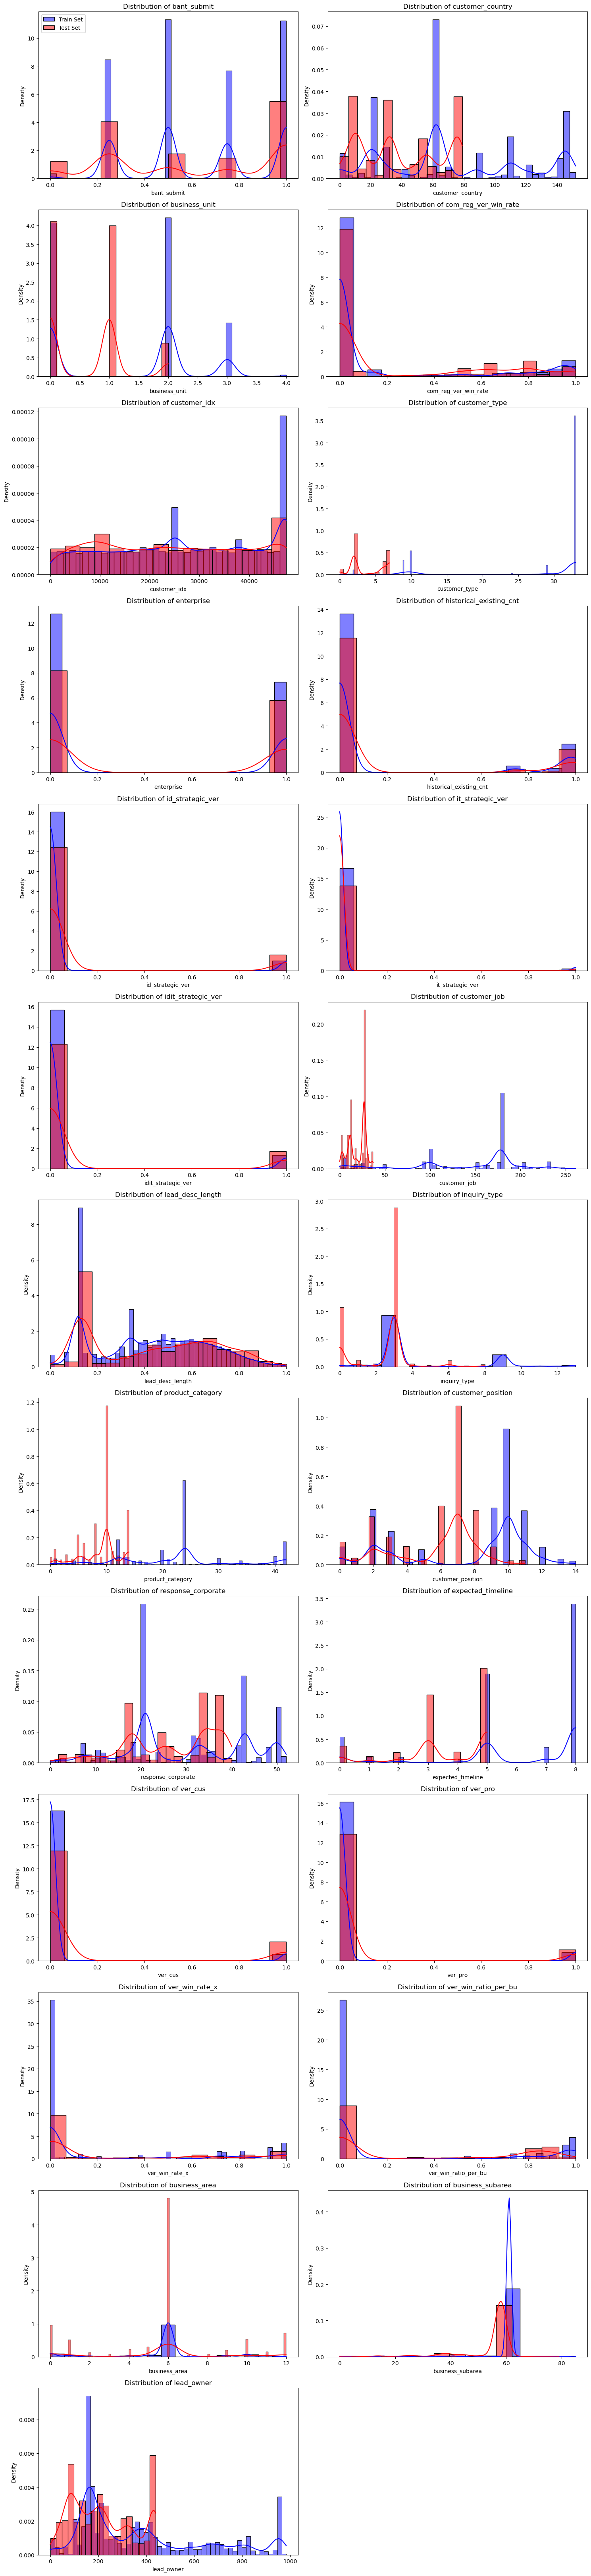

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = train_x.select_dtypes(include=['float', 'int']).columns
n_cols = 2
n_rows = len(numeric_columns) // n_cols + (len(numeric_columns) % n_cols > 0)

plt.figure(figsize=(15, 5 * n_rows))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.histplot(train_x[column], color="blue", kde=True, label='Train Set', alpha=0.5, stat="density")
    sns.histplot(test_x[column], color="red", kde=True, label='Test Set', alpha=0.5, stat="density")

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    if i == 1:
        plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

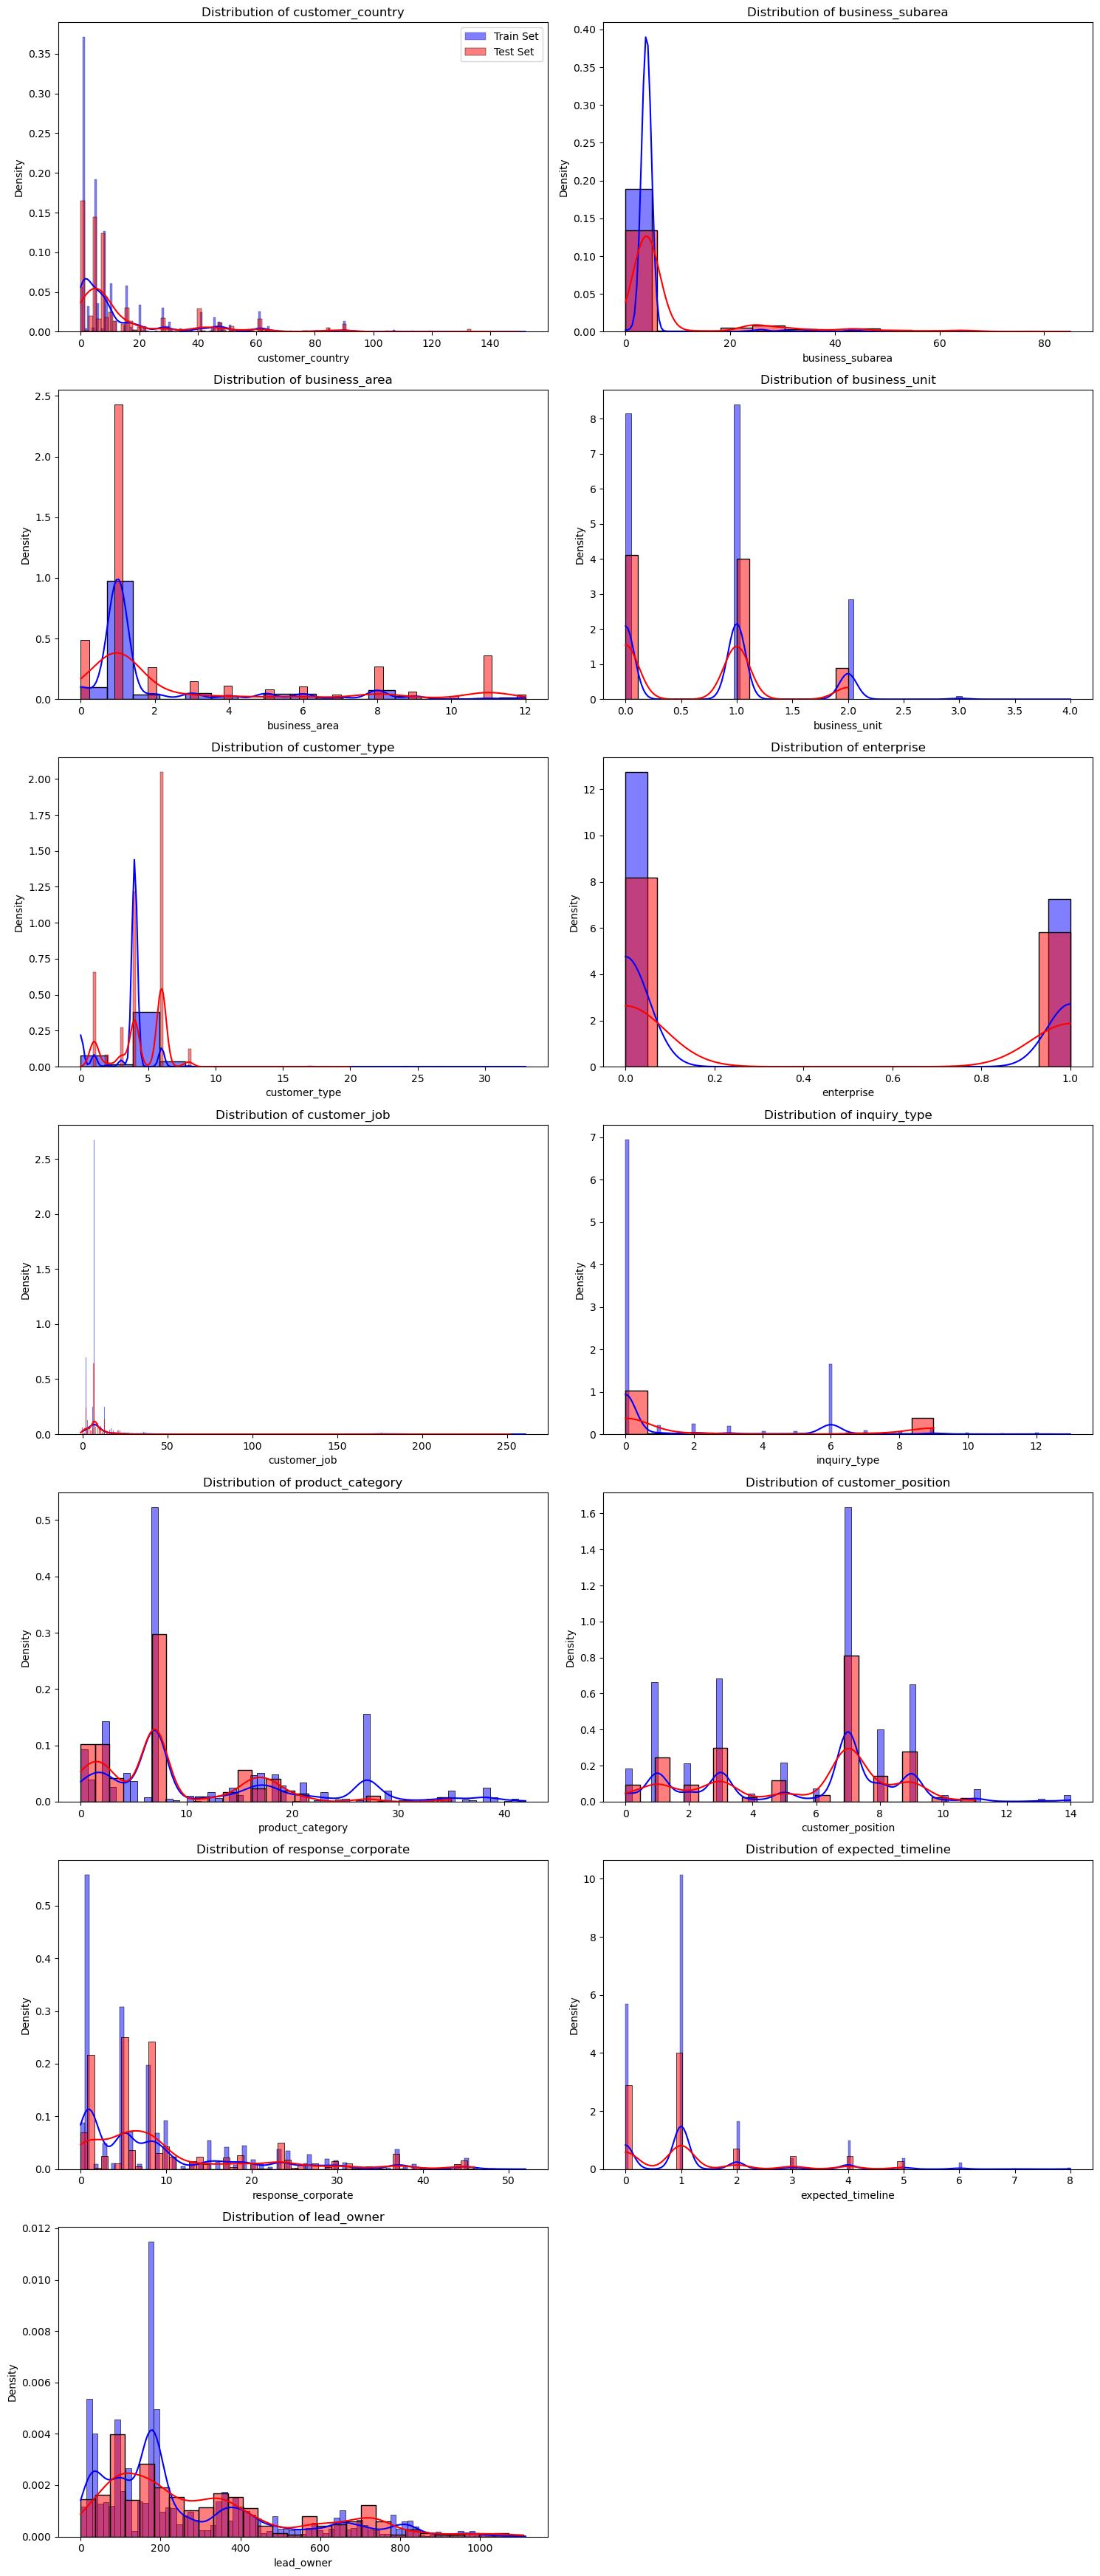

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
label_columns = [
    "customer_country", "business_subarea", "business_area",
    "business_unit", "customer_type", "enterprise",
    "customer_job", "inquiry_type", "product_category",
    "customer_position", "response_corporate", "expected_timeline", "lead_owner"
]

n_cols = 2
n_rows = len(label_columns) // n_cols + (len(label_columns) % n_cols > 0)

plt.figure(figsize=(15, 5 * n_rows))

for i, column in enumerate(label_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.histplot(train_encoded[column], color="blue", kde=True, label='Train Set', alpha=0.5, stat="density")
    sns.histplot(test_encoded[column], color="red", kde=True, label='Test Set', alpha=0.5, stat="density")

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    if i == 1:
        plt.legend()

plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

C:\Users\tadje\AppData\Local\Temp\ipykernel_7480\1073369466.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n_rows, n_cols, i)


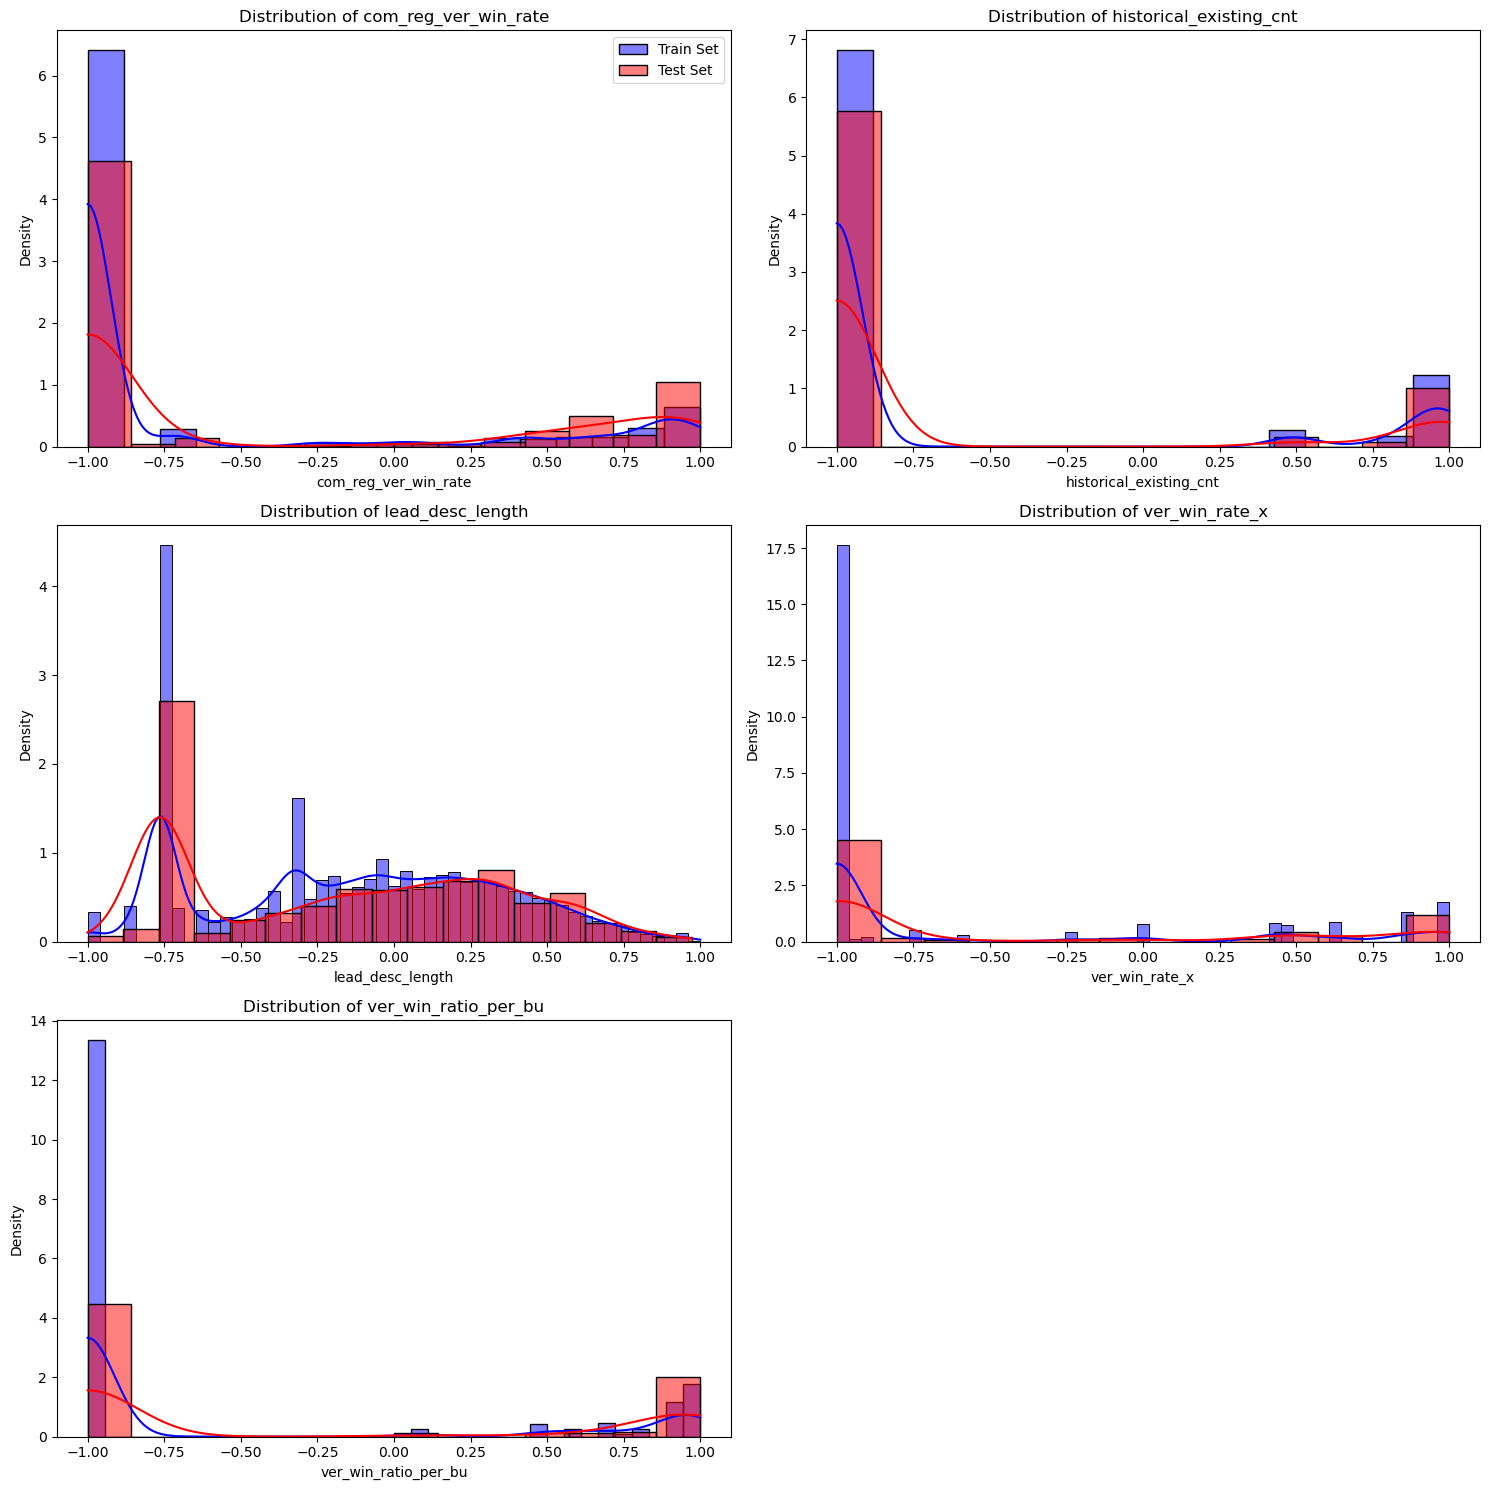

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#numeric_columns = train_x.select_dtypes(include=['float', 'int']).columns
n_cols = 2
n_rows = len(numeric_columns1) // n_cols + (len(numeric_columns1) % n_cols > 0)

plt.figure(figsize=(15, 5 * n_rows))
plt.title('전체 변환 후')
for i, column in enumerate(numeric_columns1, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.histplot(train_6f[column], color="blue", kde=True, label='Train Set', alpha=0.5, stat="density")
    sns.histplot(test_6f[column], color="red", kde=True, label='Test Set', alpha=0.5, stat="density")

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    if i == 1:
        plt.legend()
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()
plt.show()

In [ ]:
train_6f

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,0,0,0.845419,32160,0,0,-1.000000,0.0,0.0,...,0,0,1,0,1.000000,0.674311,0,0,0,True
1,1.00,0,0,0.845419,23122,0,0,0.987368,0.0,0.0,...,0,0,1,0,1.000000,0.674311,0,1,1,True
2,1.00,1,0,0.931778,1755,0,0,0.999893,0.0,0.0,...,1,0,1,0,1.000000,0.674311,0,2,2,True
3,1.00,1,0,0.931778,4919,0,0,-1.000000,0.0,0.0,...,1,0,1,0,1.000000,0.674311,0,3,3,True
4,1.00,1,0,0.931778,17126,1,0,-1.000000,0.0,0.0,...,1,0,0,0,1.000000,0.674311,0,4,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,46,0,-1.000000,33747,6,1,-1.000000,0.0,0.0,...,27,2,0,0,-0.885666,0.713653,12,4,694,False
59295,0.75,9,0,0.577980,35420,1,0,-1.000000,0.0,0.0,...,9,3,0,0,-0.885666,0.713653,12,4,39,False
59296,0.75,41,0,0.577980,19249,1,0,-1.000000,0.0,0.0,...,23,0,0,0,-0.885666,0.713653,12,4,125,False
59297,1.00,41,0,0.577980,40327,4,0,-1.000000,0.0,0.0,...,23,4,0,0,-0.885666,0.713653,12,4,134,False


In [ ]:
test_6f

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,19844,0.00,5,1,0.878890,47466,6,0,0.999242,0.0,...,5,1,1,0,0.865298,0.928573,8,45,278,0
1,9738,0.25,8,2,-1.000000,5405,6,1,-1.000000,0.0,...,8,1,0,0,-0.942782,-1.000000,11,4,437,1
2,8491,1.00,6,1,-1.000000,13597,1,1,-1.000000,0.0,...,6,0,0,0,-0.743194,0.999569,4,32,874,0
3,19895,0.50,8,1,0.976586,17204,4,0,-1.000000,0.0,...,8,4,0,0,0.865298,0.928573,8,4,194,0
4,10465,1.00,5,1,0.886261,2329,6,0,0.771470,1.0,...,5,0,1,1,1.000000,0.972495,0,0,167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,13855,0.50,5,0,-1.000000,40292,4,0,0.982431,0.0,...,5,1,0,0,-1.000000,-1.000000,1,4,97,0
5267,7979,0.25,8,2,-1.000000,47466,4,0,-1.000000,0.0,...,8,1,0,0,-1.000000,-1.000000,1,4,438,1
5268,12887,0.75,5,0,-1.000000,46227,1,0,-1.000000,0.0,...,5,0,0,0,-1.000000,-1.000000,1,4,97,0
5269,17530,0.00,8,2,-1.000000,45667,6,1,-1.000000,0.0,...,24,1,0,0,-1.000000,-1.000000,1,4,429,0


In [ ]:
var1 = 'bant_submit, expected_timeline, customer_country, business_unit, enterprise, \
lead_desc_length, customer_position, customer_type, response_corporate, lead_owner, inquiry_type, is_converted'.split(', ')

In [ ]:
train_6f[var1]

,bant_submit,expected_timeline,customer_country,business_unit,enterprise,lead_desc_length,customer_position,response_corporate,lead_owner,inquiry_type,is_converted
0,1.00,0,0,0,0,0.123642,0,0,0,0,True
1,1.00,0,0,0,0,0.255241,1,0,1,0,True
2,1.00,0,1,0,0,0.092850,2,1,2,1,True
3,1.00,0,1,0,0,0.019708,1,1,3,0,True
4,1.00,0,1,0,0,0.258346,2,1,4,0,True
...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,2,46,0,1,0.473117,0,27,694,1,False
59295,0.75,3,9,0,0,0.160286,11,9,39,9,False
59296,0.75,0,41,0,0,-0.058694,0,23,125,9,False
59297,1.00,4,41,0,0,0.657709,9,23,134,0,False



1. grid_search
2. optuna

In [ ]:
#case1 : var1 = 'bant_submit, customer_country, business_unit, enterprise, \
# lead_desc_length, customer_position, response_corporate, lead_owner, inquiry_type, is_converted'.split(', ')
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, recall_score, f1_score

x_train, x_val, y_train, y_val = train_test_split(
    train_6f.drop("is_converted", axis=1),
    train_6f["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=230,
)

xgb_clf = xgb.XGBClassifier(tree_method = "hist", random_state=123)

param_grid = {
    'min_child_weight' : [0.1, 0.3],
    'max_depth': [6, 8],
    'learning_rate': [0.14, 0.2],
    'n_estimators': [500, 700],
    'subsample': [0.6, 0.9],
    'alpha' : [1, 3],
    'lambda' : [0.2, 1],
    'gamma' : [0.5, 1],
    'scale_pos_weight' : [11.2265],
}

grid_search5 = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=12)
grid_search5.fit(x_train, y_train)

print("Best Parameters:", grid_search5.best_params_)
print("Best Score:", grid_search5.best_score_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'alpha': 1, 'gamma': 0.5, 'lambda': 0.2, 'learning_rate': 0.14, 'max_depth': 6, 'min_child_weight': 0.1, 'n_estimators': 700, 'scale_pos_weight': 11.2265, 'subsample': 0.6}
Best Score: 0.8346985776717444


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_model5 = grid_search5.best_estimator_
y_pred4 = best_model5.predict(x_val)
print(f1_score(y_val, y_pred4))
print(accuracy_score(y_val, y_pred4))
print(precision_score(y_val, y_pred4))
print(recall_score(y_val, y_pred4))

0.8486017357762778
0.9735244519392917
0.8301886792452831
0.8678500986193294


In [ ]:
x_test = test_6f.drop(["is_converted", "id"], axis=1)
# 테스트 데이터셋에 대한 예측 수행
y_pred = best_model5.predict(x_test)

#df_sub = pd.read_csv("../submission.csv")
#df_sub["is_converted"] = y_pred3
#df_sub.to_csv("submission0213_1.csv", index=False)
y_pred.sum() #기본 임계값

519

In [ ]:
y_pred_proba = best_model5.predict_proba(x_test)[:, 1]
threshold = 0.02

y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
y_pred_custom_threshold.sum()

1823

In [ ]:
df_sub = pd.read_csv("../submission.csv")
df_sub["is_converted"] = y_pred_custom_threshold
df_sub.to_csv("submission0221_1.csv", index=False)

In [ ]:
df_check = pd.read_csv("../Modeling_0217/submission0217_2_025.csv")

In [ ]:
df_check = pd.read_csv("submission0217_2_008.csv")

In [ ]:
sum(df_check['is_converted']==y_pred_custom_threshold)

4477

In [ ]:
var1

['bant_submit',
 'expected_timeline',
 'customer_country',
 'business_unit',
 'enterprise',
 'lead_desc_length',
 'customer_position',
 'customer_type response_corporate',
 'lead_owner',
 'inquiry_type',
 'is_converted']

In [ ]:
train_6f_v1 = train_6f[var1]
test_6f_v1 = test_6f[var1]

In [ ]:
#case2 : var1 = 'bant_submit, expected_timeline, customer_country, business_unit, enterprise, \
#lead_desc_length, customer_position, customer_type response_corporate, lead_owner, inquiry_type, is_converted''.split(', ')
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
import xgboost as xgb
from sklearn.metrics import make_scorer, recall_score, f1_score

x_train, x_val, y_train, y_val = train_test_split(
    train_6f_v1.drop("is_converted", axis=1),
    train_6f_v1["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=230,
)

xgb_clf = xgb.XGBClassifier(tree_method = "hist", random_state=123)

param_grid = {
    'min_child_weight' : [0.1, 0.3],
    'max_depth': [6, 8],
    'learning_rate': [0.14, 0.2],
    'n_estimators': [500, 700],
    'subsample': [0.6, 0.9],
    'alpha' : [1, 3],
    'lambda' : [0.6, 1],
    'gamma' : [0.5, 0.8],
    'scale_pos_weight' : [11.2265],
}

def positive_pred_sum()

grid_search6 = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=12)
grid_search6.fit(x_train, y_train)

print("Best Parameters:", grid_search6.best_params_)
print("Best Score:", grid_search6.best_score_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'alpha': 1, 'gamma': 0.5, 'lambda': 0.6, 'learning_rate': 0.14, 'max_depth': 8, 'min_child_weight': 0.1, 'n_estimators': 700, 'scale_pos_weight': 11.2265, 'subsample': 0.9}
Best Score: 0.836999202033995


In [ ]:
x_test = test_6f.drop(["is_converted", "id"], axis=1)
best_model6 = grid_search6.best_estimator_
y_pred = best_model6.predict(x_test)

y_pred.sum() #기본 임계값

658

In [ ]:
y_pred_proba = best_model6.predict_proba(x_test)[:, 1]
threshold = 0.03

y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
y_pred_custom_threshold.sum()

1910

In [ ]:
sum(df_check['is_converted']==y_pred_custom_threshold)

4508

In [ ]:
df_sub = pd.read_csv("../submission.csv")
df_sub["is_converted"] = y_pred_custom_threshold
df_sub.to_csv("submission0221_2.csv", index=False)  # 0.702정도...

In [ ]:
#case2 : var1 = 'bant_submit, expected_timeline, customer_country, business_unit, enterprise, \
#lead_desc_length, customer_position, customer_type response_corporate, lead_owner, inquiry_type, is_converted''.split(', ')
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
import xgboost as xgb
from sklearn.metrics import make_scorer, recall_score, f1_score

x_train, x_val, y_train, y_val = train_test_split(
    train_6f_v1.drop("is_converted", axis=1),
    train_6f_v1["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=230,
)

xgb_clf = xgb.XGBClassifier(tree_method = "hist", random_state=123)

param_grid = {
    'min_child_weight' : [0.1, 0.3],
    'max_depth': [6, 8],
    'learning_rate': [0.14, 0.2],
    'n_estimators': [500, 700],
    'subsample': [0.6, 0.9],
    'alpha' : [1, 3],
    'lambda' : [0.6, 1],
    'gamma' : [0.5, 0.8],
    'scale_pos_weight' : [11.2265],
}

grid_search6 = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=12)
grid_search6.fit(x_train, y_train)

print("Best Parameters:", grid_search6.best_params_)
print("Best Score:", grid_search6.best_score_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best Parameters: {'alpha': 1, 'gamma': 0.5, 'lambda': 0.6, 'learning_rate': 0.14, 'max_depth': 8, 'min_child_weight': 0.3, 'n_estimators': 500, 'scale_pos_weight': 11.2265, 'subsample': 0.9}
Best Score: 0.5480703321543978


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_model6 = grid_search6.best_estimator_
y_pred4 = best_model6.predict(x_val)
print(f1_score(y_val, y_pred4))
print(accuracy_score(y_val, y_pred4))
print(precision_score(y_val, y_pred4))
print(recall_score(y_val, y_pred4))

0.5995125913891146
0.9168634064080944
0.5096685082872928
0.727810650887574


In [ ]:
var2 = 'bant_submit, expected_timeline, customer_country, business_unit, enterprise, \
lead_desc_length, customer_position, customer_type, response_corporate, lead_owner, inquiry_type, business_area, product_category, is_converted'.split(', ')
train_6f_v2 = train_6f[var2]
test_6f_v2 = test_6f[var2]

In [ ]:
#case2 : var1 = 'bant_submit, expected_timeline, customer_country, business_unit, enterprise, \
#lead_desc_length, customer_position, customer_type response_corporate, lead_owner, inquiry_type, is_converted''.split(', ')
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
import xgboost as xgb
from sklearn.metrics import make_scorer, recall_score, f1_score

x_train, x_val, y_train, y_val = train_test_split(
    train_6f_v2.drop("is_converted", axis=1),
    train_6f_v2["is_converted"],
    test_size=0.1,
    shuffle=True,
    random_state=230,
)

xgb_clf = xgb.XGBClassifier(tree_method = "hist", random_state=123)

param_grid = {
    'min_child_weight' : [1, 3],
    'max_depth': [6, 8],
    'learning_rate': [0.14, 0.2],
    'n_estimators': [500, 600, 700],
    'subsample': [0.6, 0.9],
    'alpha' : [0.5, 1, 2],
    'lambda' : [0.6,0.8],
    'gamma' : [0.5, 0.8],
    'scale_pos_weight' : [11.2265],
}

grid_search7 = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=12)
grid_search7.fit(x_train, y_train)

print("Best Parameters:", grid_search6.best_params_)
print("Best Score:", grid_search6.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'alpha': 1, 'gamma': 0.5, 'lambda': 0.6, 'learning_rate': 0.14, 'max_depth': 8, 'min_child_weight': 0.3, 'n_estimators': 500, 'scale_pos_weight': 11.2265, 'subsample': 0.9}
Best Score: 0.5480703321543978


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
best_model7 = grid_search7.best_estimator_
y_pred4 = best_model7.predict(x_val)
print(f1_score(y_val, y_pred4))
print(accuracy_score(y_val, y_pred4))
print(precision_score(y_val, y_pred4))
print(recall_score(y_val, y_pred4))

0.6763948497854078
0.9364249578414839
0.5987841945288754
0.777120315581854


In [ ]:
test_6f_v2

,bant_submit,expected_timeline,customer_country,business_unit,enterprise,lead_desc_length,customer_position,customer_type,response_corporate,lead_owner,inquiry_type,business_area,product_category,is_converted
0,0.00,1,5,1,0,-0.763651,7,6,5,278,9,8,7,0
1,0.25,1,8,2,1,-0.177648,7,6,8,437,0,11,7,1
2,1.00,0,6,1,1,0.363491,3,1,6,874,0,4,7,0
3,0.50,4,8,1,0,-0.763651,7,4,8,194,0,8,7,0
4,1.00,0,5,1,0,0.287701,9,6,5,167,0,0,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,0.50,1,5,0,0,-0.532753,5,4,5,97,0,1,7,0
5267,0.25,1,8,2,0,0.401726,7,4,8,438,0,1,7,1
5268,0.75,0,5,0,0,-0.016954,3,1,5,97,9,1,0,0
5269,0.00,1,8,2,1,-0.763651,7,6,24,429,9,1,7,0


In [ ]:
x_test = test_6f_v2.drop(["is_converted"], axis=1)
best_model7 = grid_search7.best_estimator_
y_pred = best_model7.predict(x_test)

y_pred.sum() #기본 임계값

853

In [ ]:
y_pred_proba = best_model7.predict_proba(x_test)[:, 1]
threshold = 0.07

y_pred_custom_threshold = np.where(y_pred_proba > threshold, 1, 0)
y_pred_custom_threshold.sum()

1960

In [ ]:
sum(df_check['is_converted'])

2075

In [ ]:
sum(df_check['is_converted']==y_pred_custom_threshold)

4574